<a href="https://colab.research.google.com/github/dojun43/Project/blob/main/02.%20%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89%20%EC%98%88%EC%B8%A1%20AI%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%5B%EB%AA%A8%EB%8D%B8%EB%A7%81%5D_%EC%A0%84%EB%A0%A5_%EC%82%AC%EC%9A%A9%EB%9F%89_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/My Drive/전력사용량.csv', encoding='cp949')

#column 이름 바꾸기 
col_name = ['건물번호', '날짜', '전력사용량', '기온', '풍속','습도' ,'강우량', '일조', '비전기냉방설비운영', '태양광보유']
df.columns = col_name
df

,건물번호,날짜,전력사용량,기온,풍속,습도,강우량,일조,비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [ ]:
#column 이름 확인
df.columns

Index(['건물번호', '날짜', '전력사용량', '기온', '풍속', '습도', '강우량', '일조', '비전기냉방설비운영',
       '태양광보유'],
      dtype='object')

In [ ]:
#시간 변수 추가 
import datetime
format = '%Y-%m-%d %H'

year_list = [] 
month_list = [] 
day_list = [] 
hour_list = [] 
sec_list = [] 

for i in range(len(df)):
  str_datetime = df.날짜[i]
  dt_datetime = datetime.datetime.strptime(str_datetime,format)
  year_list.append(dt_datetime.year)
  month_list.append(dt_datetime.month)
  day_list.append(dt_datetime.day)
  hour_list.append(dt_datetime.hour)
  sec_list.append(dt_datetime.timestamp())

df['연도'] = year_list
df['월'] = month_list
df['일'] = day_list
df['시간'] = hour_list
df['초'] = sec_list

In [ ]:
df

,건물번호,날짜,전력사용량,기온,풍속,습도,강우량,일조,비전기냉방설비운영,태양광보유,연도,월,일,시간,초
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,2020,6,1,0,1.590970e+09
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,2020,6,1,1,1.590973e+09
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2020,6,1,2,1.590977e+09
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,2020,6,1,3,1.590980e+09
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,2020,6,1,4,1.590984e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,2020,8,24,19,1.598296e+09
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,2020,8,24,20,1.598299e+09
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,2020,8,24,21,1.598303e+09
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,2020,8,24,22,1.598306e+09


In [ ]:
df = df[df.건물번호 == 60]

In [ ]:
df

,건물번호,날짜,전력사용량,기온,풍속,습도,강우량,일조,비전기냉방설비운영,태양광보유,연도,월,일,시간,초
120360,60,2020-06-01 00,2528.496,17.1,2.6,94.0,0.1,0.0,1.0,1.0,2020,6,1,0,1.590970e+09
120361,60,2020-06-01 01,2243.808,17.0,5.7,94.0,0.0,0.0,1.0,1.0,2020,6,1,1,1.590973e+09
120362,60,2020-06-01 02,2284.848,16.4,5.4,95.0,0.0,0.0,1.0,1.0,2020,6,1,2,1.590977e+09
120363,60,2020-06-01 03,2248.992,16.4,3.9,96.0,0.0,0.0,1.0,1.0,2020,6,1,3,1.590980e+09
120364,60,2020-06-01 04,2377.728,16.3,5.3,96.0,0.0,0.0,1.0,1.0,2020,6,1,4,1.590984e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,2020,8,24,19,1.598296e+09
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,2020,8,24,20,1.598299e+09
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,2020,8,24,21,1.598303e+09
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,2020,8,24,22,1.598306e+09


In [ ]:
df_x = df.loc[:,['기온', '풍속', '습도', '강우량', '일조','시간']]
df_y = df.loc[:,['전력사용량']]

In [ ]:
df_x

,기온,풍속,습도,강우량,일조,시간
120360,17.1,2.6,94.0,0.1,0.0,0
120361,17.0,5.7,94.0,0.0,0.0,1
120362,16.4,5.4,95.0,0.0,0.0,2
120363,16.4,3.9,96.0,0.0,0.0,3
120364,16.3,5.3,96.0,0.0,0.0,4
...,...,...,...,...,...,...
122395,27.8,2.3,68.0,0.0,0.7,19
122396,27.3,1.2,71.0,0.0,0.0,20
122397,27.3,1.8,71.0,0.0,0.0,21
122398,27.1,1.8,74.0,0.0,0.0,22


In [ ]:
df_y

,전력사용량
120360,2528.496
120361,2243.808
120362,2284.848
120363,2248.992
120364,2377.728
...,...
122395,4114.368
122396,3975.696
122397,3572.208
122398,3299.184


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

In [ ]:
#정규화
data_scaler = MinMaxScaler()
df_x = data_scaler.fit_transform(df_x)

target_scaler = MinMaxScaler()
df_y = target_scaler.fit_transform(df_y)

In [ ]:
df_x

array([[0.17613636, 0.26041667, 0.90909091, 0.003125  , 0.        ,
        0.        ],
       [0.17045455, 0.58333333, 0.90909091, 0.        , 0.        ,
        0.04347826],
       [0.13636364, 0.55208333, 0.92424242, 0.        , 0.        ,
        0.08695652],
       ...,
       [0.75568182, 0.17708333, 0.56060606, 0.        , 0.        ,
        0.91304348],
       [0.74431818, 0.17708333, 0.60606061, 0.        , 0.        ,
        0.95652174],
       [0.74431818, 0.26041667, 0.62121212, 0.        , 0.        ,
        1.        ]])

In [ ]:
df_y

array([[0.29152879],
       [0.19172491],
       [0.20611242],
       ...,
       [0.65742585],
       [0.56171105],
       [0.52854406]])

In [ ]:
#데이터 분할 
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, shuffle=False)

In [ ]:
# train set, test set 분할 후 shape 
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (1632, 6) y_train: (1632, 1)
x_test: (408, 6) y_test: (408, 1)


In [ ]:
#ANN
model = Sequential()
model.add(Dense(units = 6,kernel_initializer = 'uniform', activation = 'ReLU'))
model.add(Dense(units = 12,kernel_initializer = 'uniform', activation = 'ReLU'))
model.add(Dense(units = 6,kernel_initializer = 'uniform', activation = 'ReLU'))
model.add(Dense(units = 1,kernel_initializer = 'uniform', activation = 'ReLU'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
51/51 [==============================] - 1s 9ms/step - loss: 0.2960 - val_loss: 0.4108
Epoch 2/20
51/51 [==============================] - 0s 4ms/step - loss: 0.2066 - val_loss: 0.2354
Epoch 3/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0517 - val_loss: 0.0242
Epoch 4/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.0278
Epoch 5/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.0268
Epoch 6/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0277
Epoch 7/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0268
Epoch 8/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.0261
Epoch 9/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.0258
Epoch 10/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.0274
Epoch 11/20
51/51 [

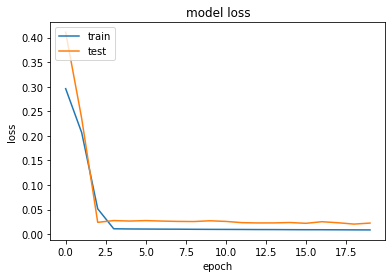

In [ ]:
#학습 진행률 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import sklearn.metrics as metrics 

#loss 측정 함수 
def rmse(y_true, y_pred): 
  mse=metrics.mean_squared_error(y_true, y_pred) 
  
  print('RMSE: ', round(np.sqrt(mse),4))

print('------------------------------------------------------------------------')
print('train_loss')
y_true = target_scaler.inverse_transform(y_train)
y_pred = model.predict(x_train)
y_pred = target_scaler.inverse_transform(y_pred)
rmse(y_true, y_pred)
print('------------------------------------------------------------------------')
print('test_loss')
y_true = target_scaler.inverse_transform(y_test)
y_pred = model.predict(x_test)
rmse(y_true, y_pred)

------------------------------------------------------------------------
train_loss
RMSE:  266.3794
------------------------------------------------------------------------
test_loss
RMSE:  3669.9041


In [ ]:
#예측 값 inverse 
predictions = model.predict(x_test)
predictions = target_scaler.inverse_transform(predictions)

valid = target_scaler.inverse_transform(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


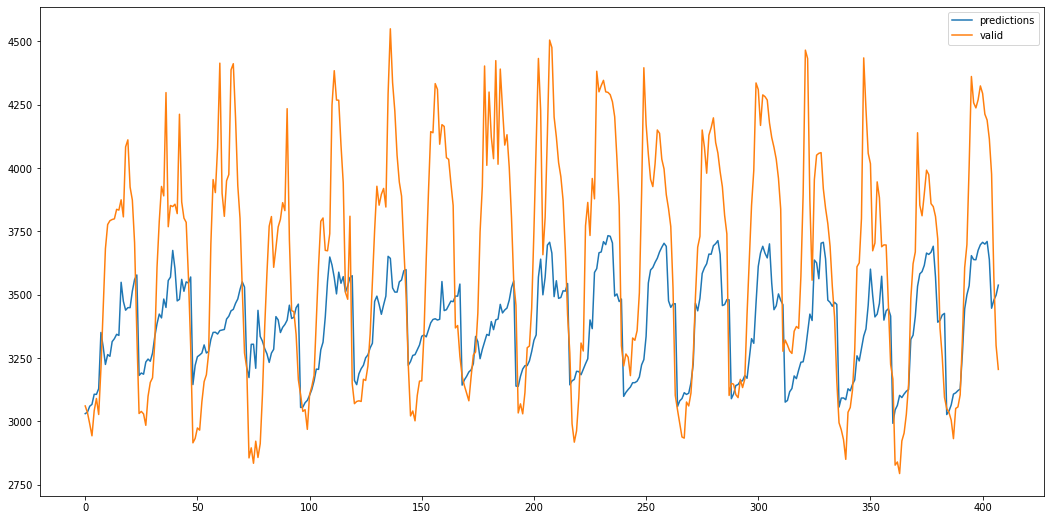

In [ ]:
#시각화
plt.figure(figsize=(18,9))
plt.plot(predictions)
plt.plot(valid)

plt.legend(['predictions', 'valid'], loc = 'low')